# Projeto 2

Para o Projeto 2 o objetivo é responder10 perguntas de negócio a partir de um dataset sobre uma rede de varejo que comercializa diversos produtos em diversas cidades dos EUA.

Os dados são reais e foram extraídos do link abaixo:

https://community.tableau.com/s/question/0D54T00000CWeX8SAL/sample-superstore-sales-excelxls

### Pacotes

In [241]:
import numpy as np
import seaborn as sns
import pandas as pd
import datetime as dt
import matplotlib.pyplot as plt
from pprint import pprint

In [242]:
sns.set_theme(style = "darkgrid")

### Dados

In [243]:
dados = pd.read_csv('dataset.csv')

In [244]:
# Linhas e colunas
dados.shape

(9700, 11)

In [245]:
# Dados faltantes
# Caso houvesse, .dropna

dados.isnull().sum()

ID_Pedido       0
Data_Pedido     0
ID_Cliente      0
Segmento        0
Pais            0
Cidade          0
Estado          0
ID_Produto      0
Categoria       0
SubCategoria    0
Valor_Venda     0
dtype: int64

In [246]:
# Registros exatamente iguais
dados[dados.duplicated()]

,ID_Pedido,Data_Pedido,ID_Cliente,Segmento,Pais,Cidade,Estado,ID_Produto,Categoria,SubCategoria,Valor_Venda


In [247]:
# Colunas no dataset

for i in dados.columns:
    print(i)

ID_Pedido
Data_Pedido
ID_Cliente
Segmento
Pais
Cidade
Estado
ID_Produto
Categoria
SubCategoria
Valor_Venda


In [248]:
# Tipos de dados em cada coluna

dados.dtypes

ID_Pedido        object
Data_Pedido      object
ID_Cliente       object
Segmento         object
Pais             object
Cidade           object
Estado           object
ID_Produto       object
Categoria        object
SubCategoria     object
Valor_Venda     float64
dtype: object

In [249]:
# Conversão de str para datetime

dados['Data_PedidoDT'] = pd.to_datetime(dados['Data_Pedido'])

C:\Users\fnsb.DESKTOP-7T10APS\AppData\Local\Temp\ipykernel_1200\3152600218.py:3: UserWarning: Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.
  dados['Data_PedidoDT'] = pd.to_datetime(dados['Data_Pedido'])


In [250]:
# Primeiros registros

dados.head()

,ID_Pedido,Data_Pedido,ID_Cliente,Segmento,Pais,Cidade,Estado,ID_Produto,Categoria,SubCategoria,Valor_Venda,Data_PedidoDT
0,CA-2017-152156,08/11/2017,CG-12520,Consumer,United States,Henderson,Kentucky,FUR-BO-10001798,Furniture,Bookcases,261.9600,2017-08-11
1,CA-2017-152156,08/11/2017,CG-12520,Consumer,United States,Henderson,Kentucky,FUR-CH-10000454,Furniture,Chairs,731.9400,2017-08-11
2,CA-2017-138688,12/06/2017,DV-13045,Corporate,United States,Los Angeles,California,OFF-LA-10000240,Office Supplies,Labels,14.6200,2017-12-06
3,US-2016-108966,11/10/2016,SO-20335,Consumer,United States,Fort Lauderdale,Florida,FUR-TA-10000577,Furniture,Tables,957.5775,2016-11-10
4,US-2016-108966,11/10/2016,SO-20335,Consumer,United States,Fort Lauderdale,Florida,OFF-ST-10000760,Office Supplies,Storage,22.3680,2016-11-10


In [251]:
# Últimos registros

dados.tail()

,ID_Pedido,Data_Pedido,ID_Cliente,Segmento,Pais,Cidade,Estado,ID_Produto,Categoria,SubCategoria,Valor_Venda,Data_PedidoDT
9695,CA-2018-154116,15/12/2018,KM-16660,Consumer,United States,Inglewood,California,OFF-PA-10004569,Office Supplies,Paper,22.830,2018-12-15
9696,CA-2018-154116,15/12/2018,KM-16660,Consumer,United States,Inglewood,California,OFF-AP-10000027,Office Supplies,Appliances,54.320,2018-12-15
9697,CA-2018-154116,15/12/2018,KM-16660,Consumer,United States,Inglewood,California,TEC-PH-10000675,Technology,Phones,196.776,2018-12-15
9698,CA-2017-105291,30/10/2017,SP-20920,Consumer,United States,San Luis Obispo,California,OFF-FA-10003059,Office Supplies,Fasteners,3.620,2017-10-30
9699,CA-2018-147032,31/07/2018,LB-16795,Home Office,United States,Wilmington,Delaware,OFF-PA-10003256,Office Supplies,Paper,11.540,2018-07-31


`.unique()` resulta num ndarray com cada item diferente dentro do vetor.  
`.size` resulta num número que conta os itens contidos no array.

In [252]:
print("  SEGMENTOS:")

for i in dados['Segmento'].unique():
    print(i)

  SEGMENTOS:
Consumer
Corporate
Home Office


In [253]:
print("  CATEGORIAS:")

for i in dados['Categoria'].unique():
    print(i)

  CATEGORIAS:
Furniture
Office Supplies
Technology


In [254]:
print('  NÚMERO DE SUBCATEGORIAS:')
print(dados['SubCategoria'].unique().size,'\n')

for i in dados['SubCategoria'].unique():
    print(i)

  NÚMERO DE SUBCATEGORIAS:
17 

Bookcases
Chairs
Labels
Tables
Storage
Furnishings
Art
Phones
Binders
Appliances
Paper
Accessories
Envelopes
Fasteners
Supplies
Machines
Copiers


In [255]:
print('  NÚMERO DE IDS DE PRODUTOS:', dados['ID_Produto'].unique().size)

  NÚMERO DE IDS DE PRODUTOS: 1861


In [256]:
print('  NÚMERO DE IDS DE CLIENTES:', dados['ID_Cliente'].unique().size)

  NÚMERO DE IDS DE CLIENTES: 793


In [257]:
print('País:',dados['Pais'].unique()[0])

País: United States


In [258]:
print('Número de Estados:', dados['Estado'].unique().size)

Número de Estados: 49


In [259]:
print('Número de cidades:', dados['Cidade'].unique().size)

Número de cidades: 528


In [260]:
print('  NÚMERO DE DATAS DE PEDIDO:', dados['Data_Pedido'].unique().size)

  NÚMERO DE DATAS DE PEDIDO: 1226


In [261]:
dados['Valor_Venda'].describe()

count     9700.000000
mean       230.469892
std        627.504252
min          0.444000
25%         17.248000
50%         54.272000
75%        209.932500
max      22638.480000
Name: Valor_Venda, dtype: float64

In [262]:
# Maior valor de venda
dados[dados['Valor_Venda'] == dados['Valor_Venda'].max()]

,ID_Pedido,Data_Pedido,ID_Cliente,Segmento,Pais,Cidade,Estado,ID_Produto,Categoria,SubCategoria,Valor_Venda,Data_PedidoDT
2697,CA-2015-145317,18/03/2015,SM-20320,Home Office,United States,Jacksonville,Florida,TEC-MA-10002412,Technology,Machines,22638.48,2015-03-18


In [263]:
# Menor valor de venda
dados[dados['Valor_Venda'] == dados['Valor_Venda'].min()]

,ID_Pedido,Data_Pedido,ID_Cliente,Segmento,Pais,Cidade,Estado,ID_Produto,Categoria,SubCategoria,Valor_Venda,Data_PedidoDT
4098,US-2018-102288,19/06/2018,ZC-21910,Consumer,United States,Houston,Texas,OFF-AP-10002906,Office Supplies,Appliances,0.444,2018-06-19


## 1 - Qual é a cidade com maior valor de venda de produtos da categoria 'Office Supplies'?

In [264]:
# Valor de venda de cada cidade

dados[dados['Categoria'] == 'Office Supplies'].groupby(['Cidade']).sum().sort_values(['Valor_Venda'],ascending=False)

# dados
    # todo o dataframe
# dados[dados['Categoria'] == 'Office Supplies']
    # registros cuja categoria seja "Office Supplies"
# dados[dados['Categoria'] == 'Office Supplies'].groupby(['Cidade'])
    # Agrupados pelas cidade
# dados[dados['Categoria'] == 'Office Supplies'].groupby(['Cidade']).sum()
    # Mostrando a soma dos agrupamentos
# dados[dados['Categoria'] == 'Office Supplies'].groupby(['Cidade']).sum().sort_values(['Valor_Venda'],ascending=False)
    # Organizando em ordem de Valor de Venda, decrescente

C:\Users\fnsb.DESKTOP-7T10APS\AppData\Local\Temp\ipykernel_1200\853446618.py:3: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  dados[dados['Categoria'] == 'Office Supplies'].groupby(['Cidade']).sum().sort_values(['Valor_Venda'],ascending=False)


,Valor_Venda
Cidade,
New York City,68362.814
Los Angeles,47098.100
San Francisco,41771.198
Seattle,34856.878
Philadelphia,29313.687
...,...
Ormond Beach,2.808
Pensacola,2.214
Jupiter,2.064


In [303]:
Maior_Cidade = dados[dados['Categoria'] == 'Office Supplies'].groupby(['Cidade'])[['Valor_Venda']].sum().sort_values(['Valor_Venda'],ascending=False)[:1]
Maior_Cidade

,Valor_Venda
Cidade,
New York City,68362.814


In [304]:
print('Cidade com maior valor total em vendas:', Maior_Cidade.idxmax())

Cidade com maior valor total em vendas: Valor_Venda    New York City
dtype: object


## 2 - Qual o Total de Vendas Por Data do Pedido?

Demonstre o resultado através de um gráfico de barras.

In [266]:
# Soma dos valores por data

dados2 = dados.groupby(['Data_PedidoDT']).sum().sort_values(['Data_PedidoDT'],ascending=True)

C:\Users\fnsb.DESKTOP-7T10APS\AppData\Local\Temp\ipykernel_1200\2704559473.py:3: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  dados2 = dados.groupby(['Data_PedidoDT']).sum().sort_values(['Data_PedidoDT'],ascending=True)


<Axes: xlabel='Data_PedidoDT', ylabel='Valor_Venda'>

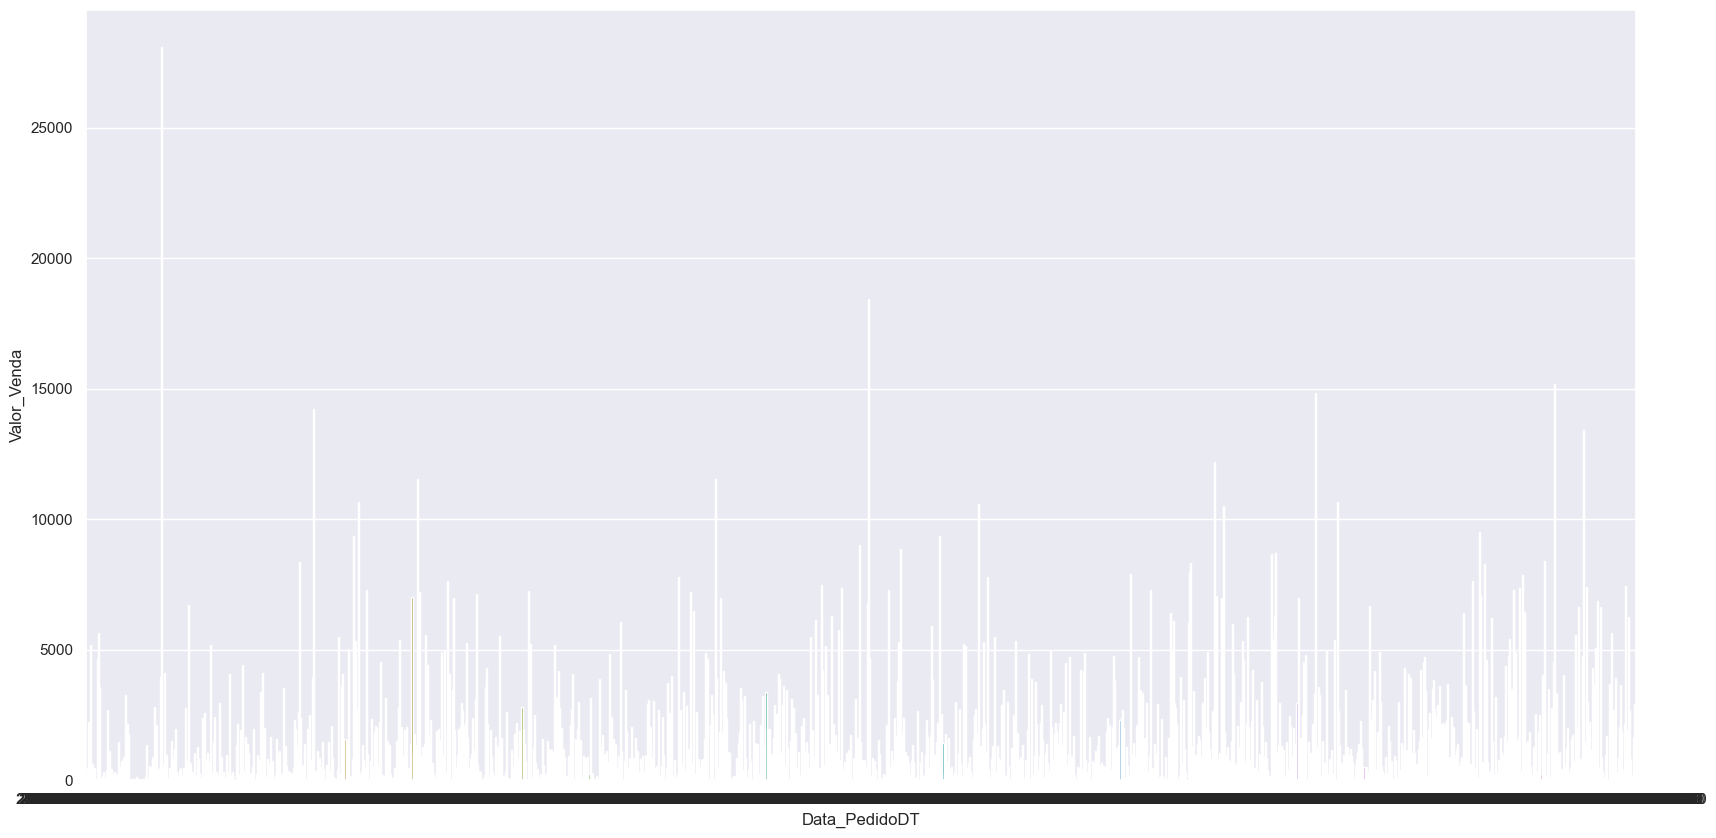

In [267]:
plt.figure(figsize = (20,10))

sns.lineplot(data = dados2, y = 'Valor_Venda', x = dados2.index)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47]),
 [Text(0, 0, '08/2017'),
  Text(1, 0, '12/2017'),
  Text(2, 0, '11/2016'),
  Text(3, 0, '09/2015'),
  Text(4, 0, '04/2018'),
  Text(5, 0, '05/2017'),
  Text(6, 0, '11/2015'),
  Text(7, 0, '05/2015'),
  Text(8, 0, '08/2015'),
  Text(9, 0, '09/2017'),
  Text(10, 0, '07/2018'),
  Text(11, 0, '09/2016'),
  Text(12, 0, '01/2017'),
  Text(13, 0, '10/2018'),
  Text(14, 0, '12/2016'),
  Text(15, 0, '07/2017'),
  Text(16, 0, '09/2018'),
  Text(17, 0, '11/2017'),
  Text(18, 0, '10/2015'),
  Text(19, 0, '06/2017'),
  Text(20, 0, '04/2016'),
  Text(21, 0, '04/2017'),
  Text(22, 0, '12/2015'),
  Text(23, 0, '03/2016'),
  Text(24, 0, '11/2018'),
  Text(25, 0, '05/2018'),
  Text(26, 0, '01/2016'),
  Text(27, 0, '06/2018'),
  Text(28, 0, '10/2016'),
  Text(29, 0, '12/2018'),
  Text(30, 0

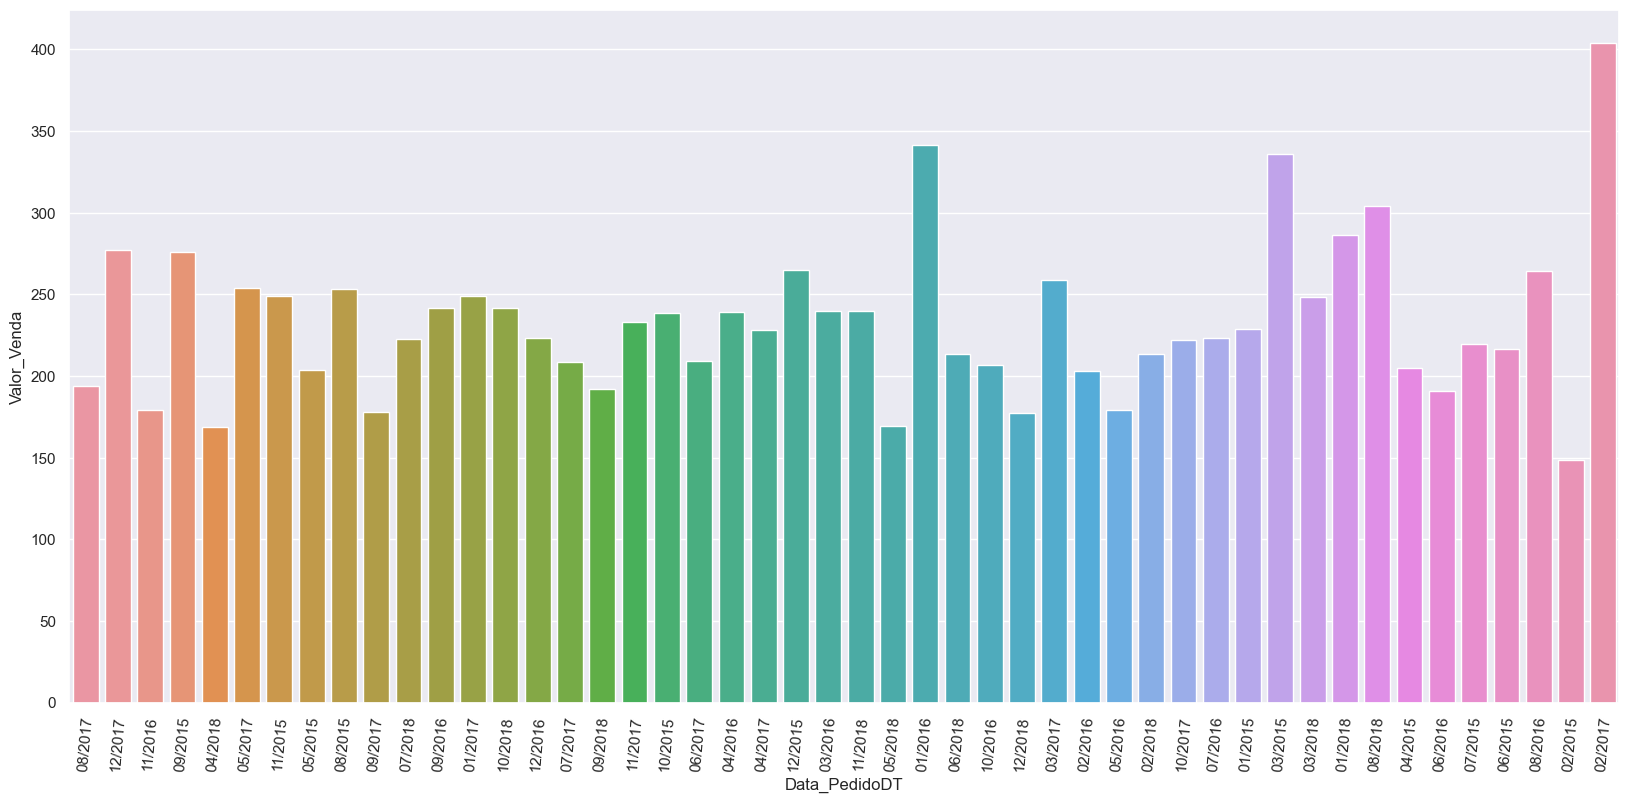

In [268]:
# Ao invés de agrupar os dados, é possível colocar as variáveis relevantes diretamente nos parâmetros do comando de plotagem. Entretanto, isso não garante que os valores serão somados, nem que estarão na ordem adequada.

# Foram mantidos apenas meses e anos

plt.figure(figsize = (20,9))
sns.barplot(y = dados['Valor_Venda'], x = dados['Data_PedidoDT'].dt.strftime('%m/%Y'), errorbar = ('ci',0))

# Rotacão do valores no eixo X
plt.xticks(rotation = 85)

In [320]:
dados2MY = dados[['Valor_Venda','Data_PedidoDT']]
dados2MYTotal.dtypes

Data_PedidoDT     object
Valor_Venda      float64
dtype: object

1
Valor_Venda             float64
Data_PedidoDT    datetime64[ns]
dtype: object 

3
Valor_Venda    float64
dtype: object 

4
Data_PedidoDT    datetime64[ns]
Valor_Venda             float64
dtype: object 

5
Data_PedidoDT    datetime64[ns]
Valor_Venda             float64
dtype: object 

7
Data_PedidoDT    datetime64[ns]
Valor_Venda             float64
m                        object
dtype: object 

8
Data_PedidoDT    datetime64[ns]
Valor_Venda             float64
m                        object
Ano                      object
dtype: object 

  Data_PedidoDT  Valor_Venda   m   Ano
0    2015-01-02      468.900  01  2015
1    2015-01-03     2203.151  01  2015
2    2015-01-04      119.888  01  2015
3    2015-01-06     5188.520  01  2015
4    2015-01-07      601.024  01  2015
9
Data_PedidoDT    datetime64[ns]
Valor_Venda             float64
m                        object
Ano                      object
dtype: object 

  Data_PedidoDT  Valor_Venda   m   Ano
0    2015-01-02      468.900  01  

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47]),
 [Text(0, 0, '01/2015'),
  Text(1, 0, '02/2015'),
  Text(2, 0, '03/2015'),
  Text(3, 0, '04/2015'),
  Text(4, 0, '05/2015'),
  Text(5, 0, '06/2015'),
  Text(6, 0, '07/2015'),
  Text(7, 0, '08/2015'),
  Text(8, 0, '09/2015'),
  Text(9, 0, '10/2015'),
  Text(10, 0, '11/2015'),
  Text(11, 0, '12/2015'),
  Text(12, 0, '01/2016'),
  Text(13, 0, '02/2016'),
  Text(14, 0, '03/2016'),
  Text(15, 0, '04/2016'),
  Text(16, 0, '05/2016'),
  Text(17, 0, '06/2016'),
  Text(18, 0, '07/2016'),
  Text(19, 0, '08/2016'),
  Text(20, 0, '09/2016'),
  Text(21, 0, '10/2016'),
  Text(22, 0, '11/2016'),
  Text(23, 0, '12/2016'),
  Text(24, 0, '01/2017'),
  Text(25, 0, '02/2017'),
  Text(26, 0, '03/2017'),
  Text(27, 0, '04/2017'),
  Text(28, 0, '05/2017'),
  Text(29, 0, '06/2017'),
  Text(30, 0

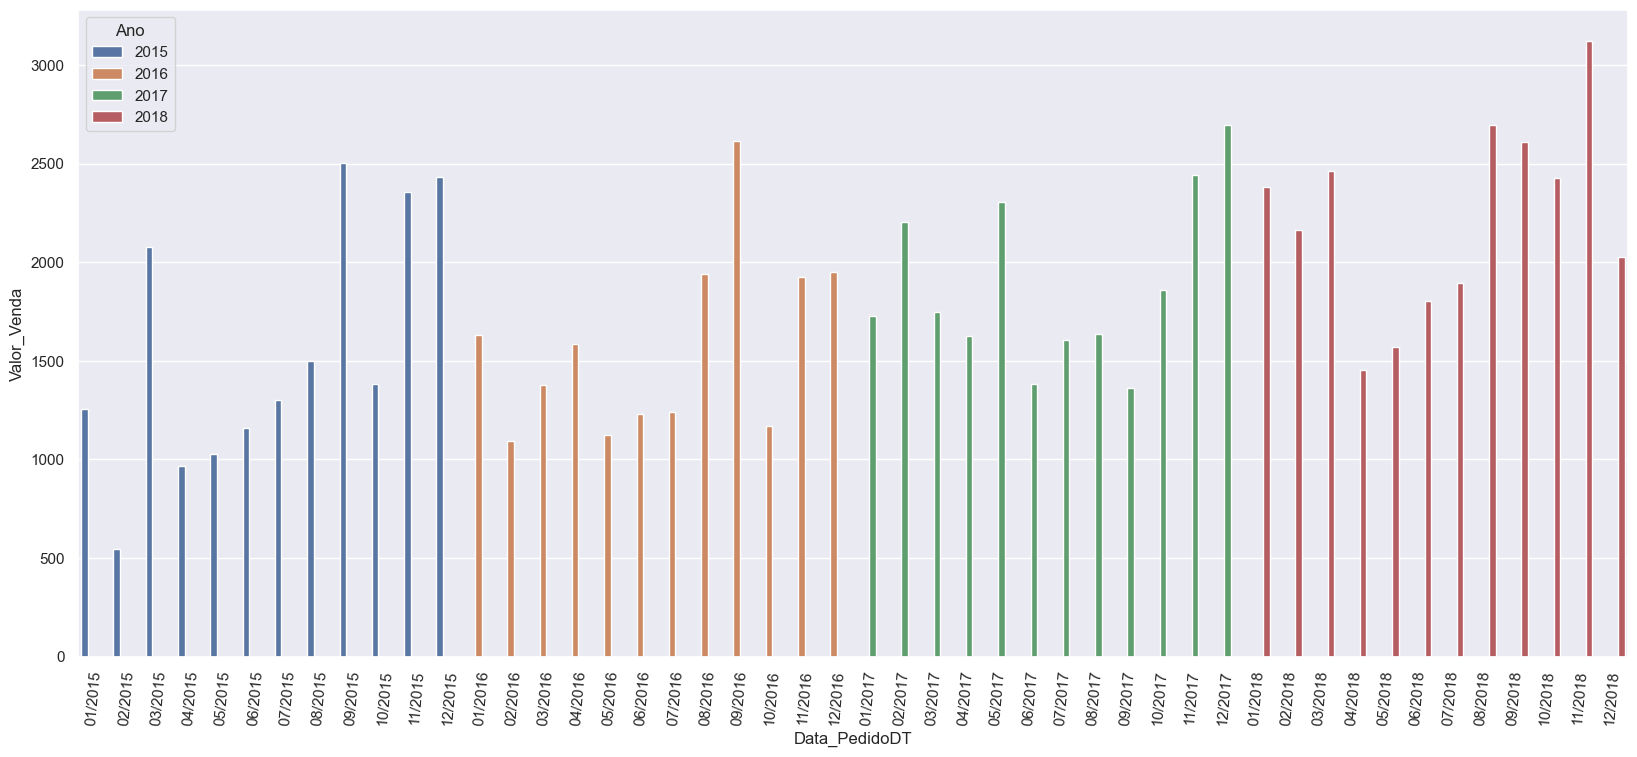

In [336]:
dados2MY = dados[['Valor_Venda','Data_PedidoDT']]
print(1)
print(dados2MY.dtypes,'\n')

dados2MYTotal = dados2MY.groupby('Data_PedidoDT').sum()
print(3)
print(dados2MYTotal.dtypes,'\n')

dados2MYTotal = dados2MYTotal.reset_index()
print(4)
print(dados2MYTotal.dtypes,'\n')

dados2MYTotal['Data_PedidoDT'] = pd.to_datetime(dados2MYTotal['Data_PedidoDT'])
print(5)
print(dados2MYTotal.dtypes,'\n')

dados2MYTotal['m'] = dados2MYTotal['Data_PedidoDT'].dt.strftime('%m')
print(7)
print(dados2MYTotal.dtypes,'\n')

dados2MYTotal['Ano'] = dados2MYTotal['Data_PedidoDT'].dt.strftime('%Y')
print(8)
print(dados2MYTotal.dtypes,'\n')
print(dados2MYTotal.head())

dados2MYTotal = dados2MYTotal.sort_values(['Ano','m'], ascending = True)
print(9)
print(dados2MYTotal.dtypes,'\n')
print(dados2MYTotal.head())

dados2MYTotal['Data_PedidoDT'] = dados2MYTotal['Data_PedidoDT'].dt.strftime('%m/%Y')
print(6)
print(dados2MYTotal.dtypes,'\n')
print(dados2MYTotal.head())


plt.figure(figsize = (20,8.4))
sns.barplot(data = dados2MYTotal, x = 'Data_PedidoDT', y = 'Valor_Venda', errorbar = ('ci',0), hue = 'Ano')

plt.xticks(rotation = 85)

<Axes: xlabel='Data_PedidoDT', ylabel='Valor_Venda'>

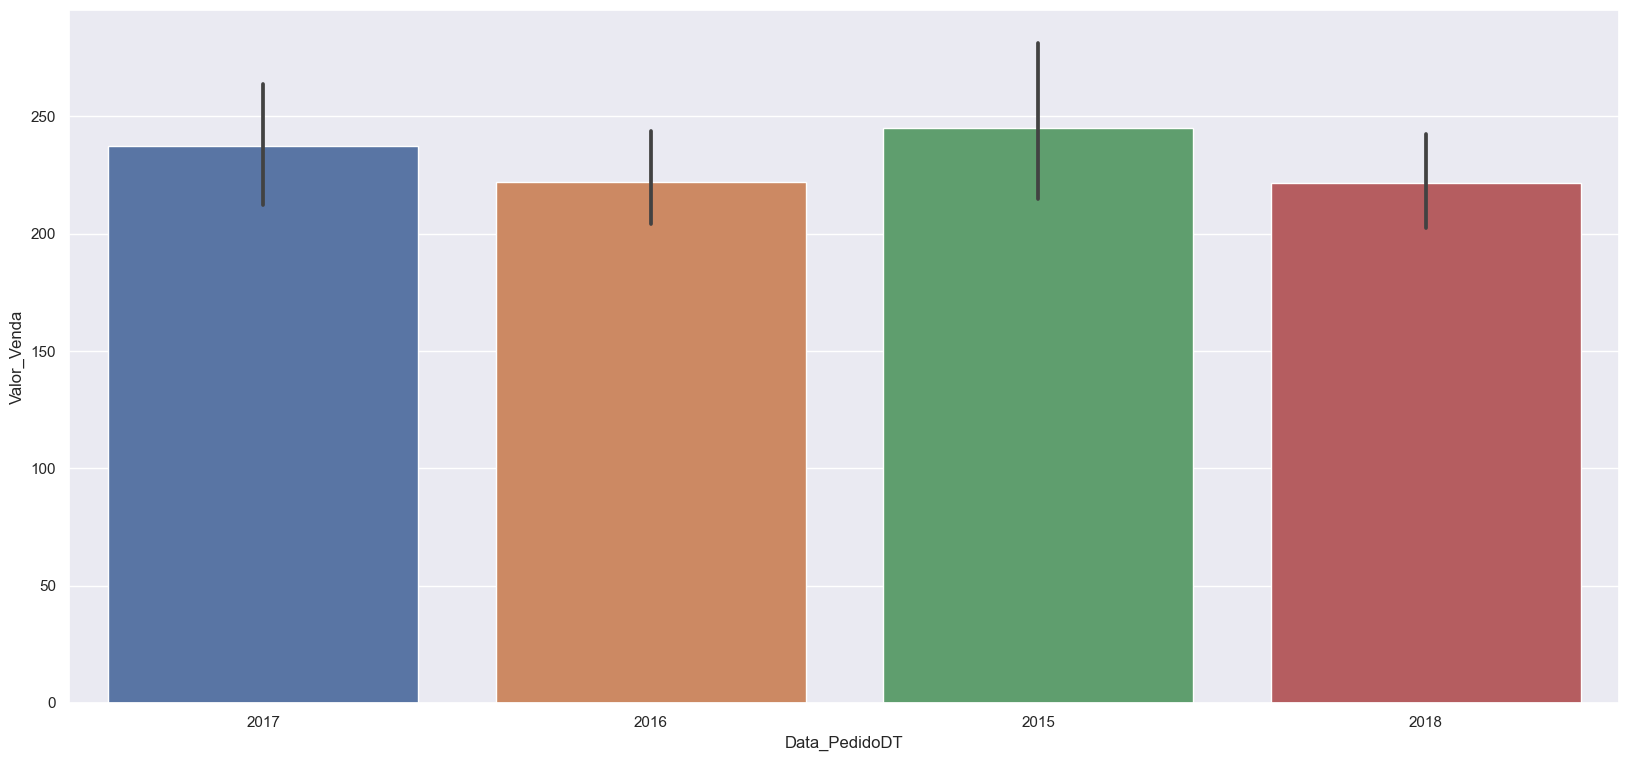

In [269]:
plt.figure(figsize = (20,9))
sns.barplot(y = dados['Valor_Venda'], x = dados['Data_PedidoDT'].dt.strftime('%Y'))

<Axes: xlabel='Data_PedidoDT', ylabel='Valor_Venda'>

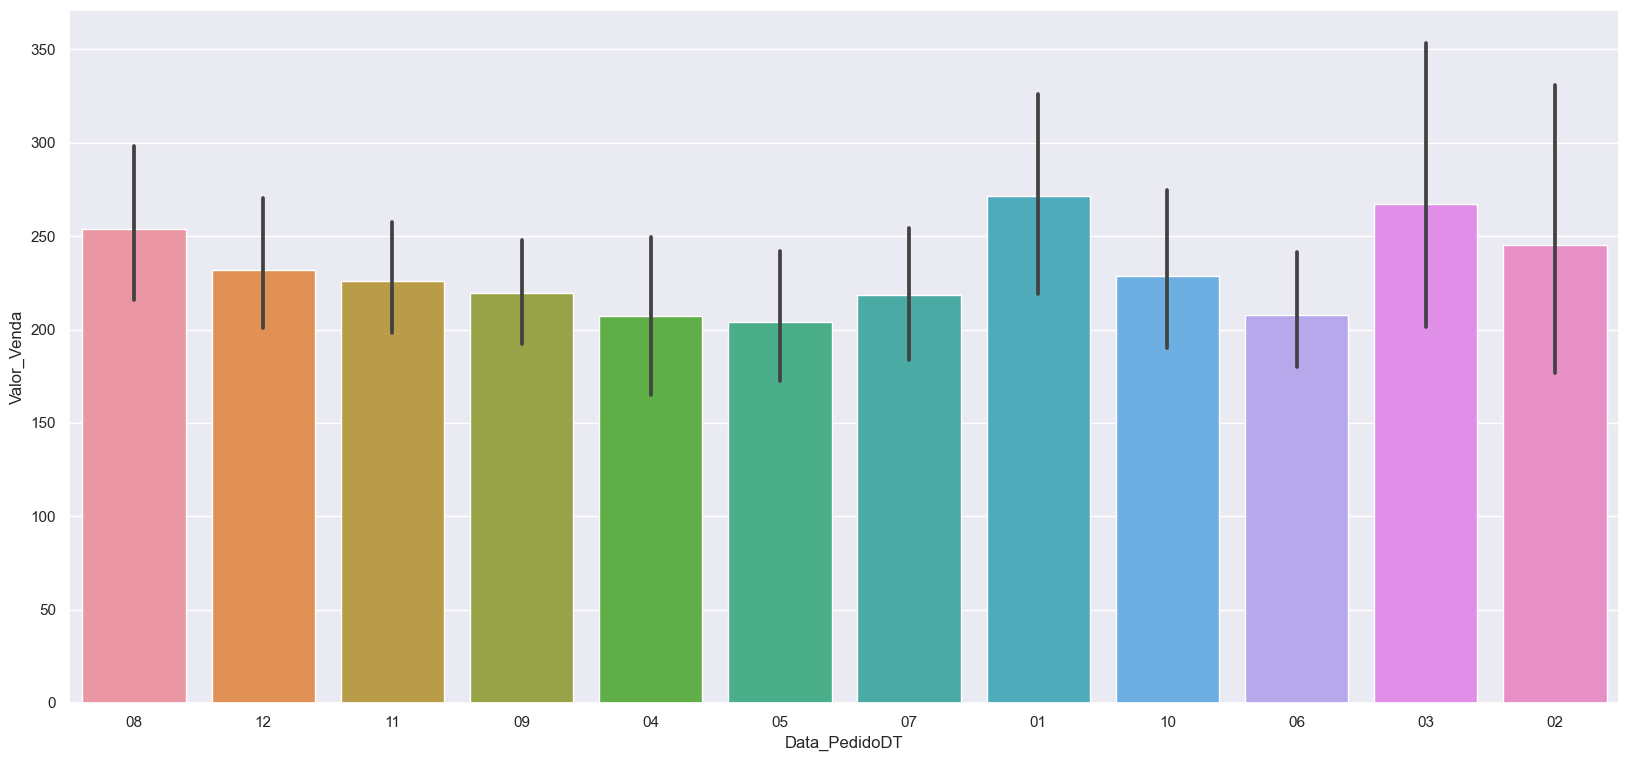

In [294]:
# Agrupando pelo diretamente pelo mês contido em 'Data_PedidoDT'

plt.figure(figsize = (20,9))
sns.barplot(y = dados['Valor_Venda'], x = dados['Data_PedidoDT'].dt.strftime('%m'))

# O valor do mês 11 não chega a 250, então muito provavelmente essa é a média, não a soma

C:\Users\fnsb.DESKTOP-7T10APS\AppData\Local\Temp\ipykernel_1200\3518022814.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  dados2seasonly = dados.groupby(['SeasonDate']).sum().sort_values(['SeasonDate'],ascending=True)


<Axes: xlabel='SeasonDate', ylabel='Valor_Venda'>

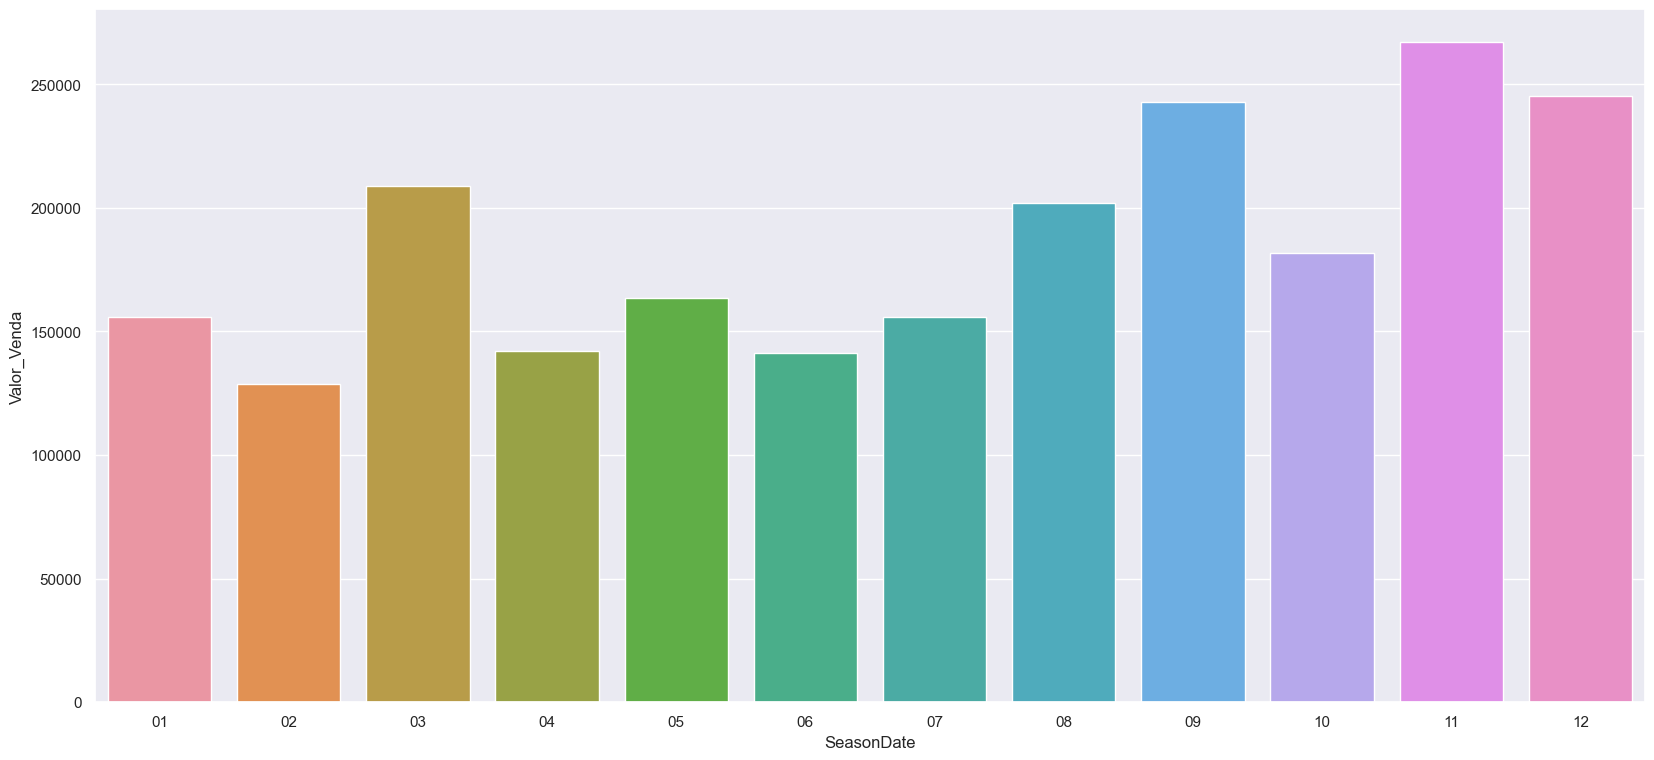

In [295]:
# Agrupando antes de plotar

dados['SeasonDate'] = dados['Data_PedidoDT'].dt.strftime('%m')
dados2seasonly = dados.groupby(['SeasonDate']).sum().sort_values(['SeasonDate'],ascending=True)

plt.figure(figsize = (20,9))
sns.barplot(data = dados2seasonly, y = 'Valor_Venda', x = dados2seasonly.index)

# O mês 11 passa de 250.000, então o gráfico anterior não apresenta soma.

<Axes: xlabel='Data_PedidoDT', ylabel='Valor_Venda'>

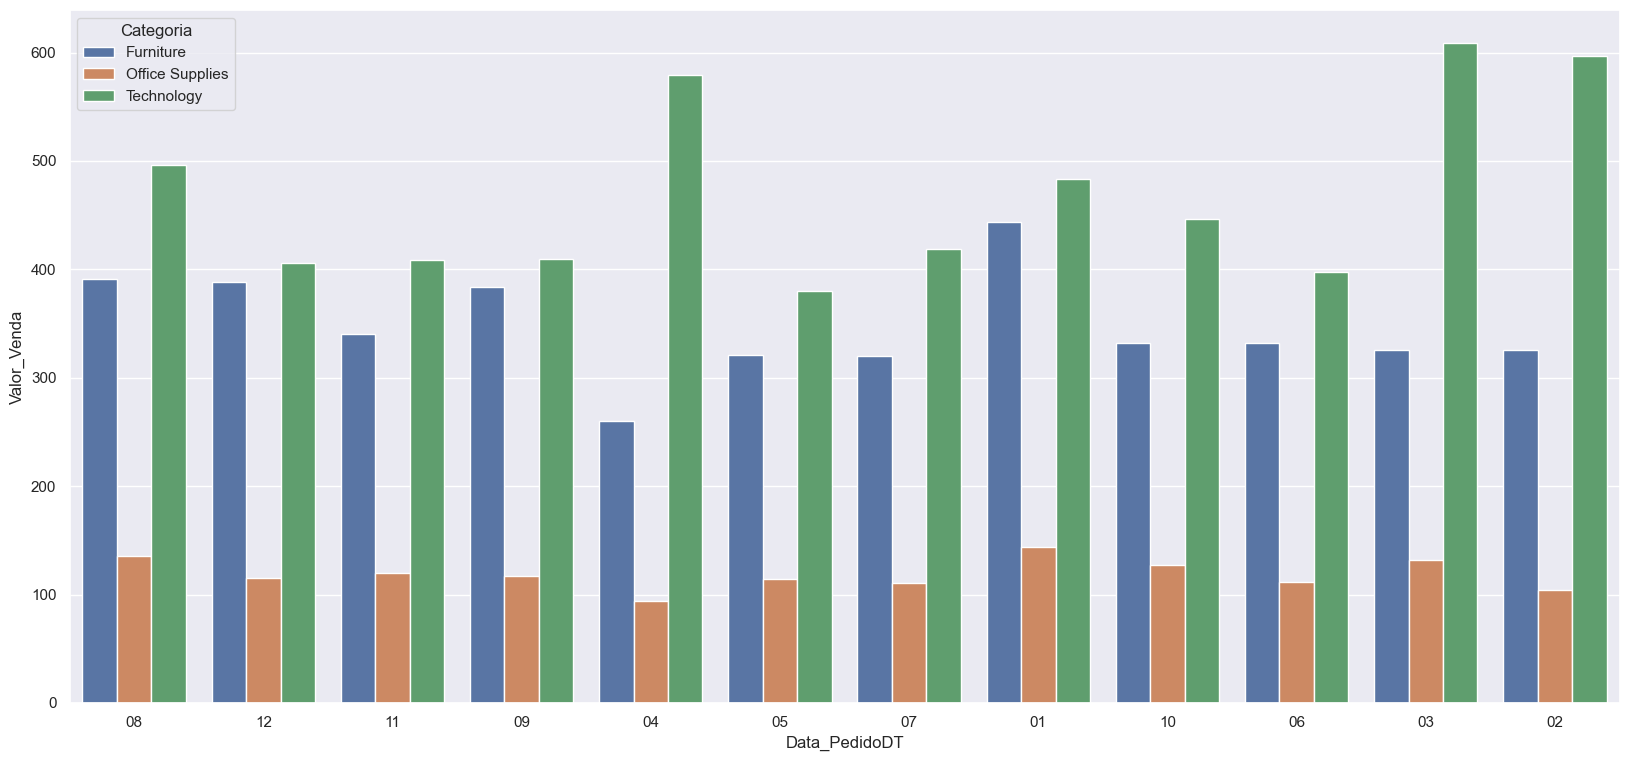

In [296]:
plt.figure(figsize = (20,9))

sns.barplot(y = dados['Valor_Venda'], x = dados['Data_PedidoDT'].dt.strftime('%m'), hue = dados['Categoria'], errorbar = ('ci',0))

# A solução mais adequada seria criar um df onde cada registro refere-se a um período e cada coluna a uma categoria.

## 3 - Qual o Total de Vendas por Estado?

Demonstre o resultado através de um gráfico de barras.

In [342]:
dados3 = dados.groupby('Estado').sum().reset_index()
dados3.head()

C:\Users\fnsb.DESKTOP-7T10APS\AppData\Local\Temp\ipykernel_1200\3203502460.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  dados3 = dados.groupby('Estado').sum().reset_index()


,Estado,Valor_Venda,Desconto,Valor_Descontado
0,Alabama,19510.6400,6.4,17067.19850
1,Arizona,35272.6570,22.5,31480.91380
2,Arkansas,11673.8300,6.0,10363.35100
3,California,442927.0975,197.8,389488.86725
4,Colorado,31841.5980,18.1,28297.82775


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48]),
 [Text(0, 0, 'Alabama'),
  Text(1, 0, 'Arizona'),
  Text(2, 0, 'Arkansas'),
  Text(3, 0, 'California'),
  Text(4, 0, 'Colorado'),
  Text(5, 0, 'Connecticut'),
  Text(6, 0, 'Delaware'),
  Text(7, 0, 'District of Columbia'),
  Text(8, 0, 'Florida'),
  Text(9, 0, 'Georgia'),
  Text(10, 0, 'Idaho'),
  Text(11, 0, 'Illinois'),
  Text(12, 0, 'Indiana'),
  Text(13, 0, 'Iowa'),
  Text(14, 0, 'Kansas'),
  Text(15, 0, 'Kentucky'),
  Text(16, 0, 'Louisiana'),
  Text(17, 0, 'Maine'),
  Text(18, 0, 'Maryland'),
  Text(19, 0, 'Massachusetts'),
  Text(20, 0, 'Michigan'),
  Text(21, 0, 'Minnesota'),
  Text(22, 0, 'Mississippi'),
  Text(23, 0, 'Missouri'),
  Text(24, 0, 'Montana'),
  Text(25, 0, 'Nebraska'),
  Text(26, 0, 'Nevada'),
  Text(27, 0, 'New Hampshire'),
  Text(28, 0, 'New J

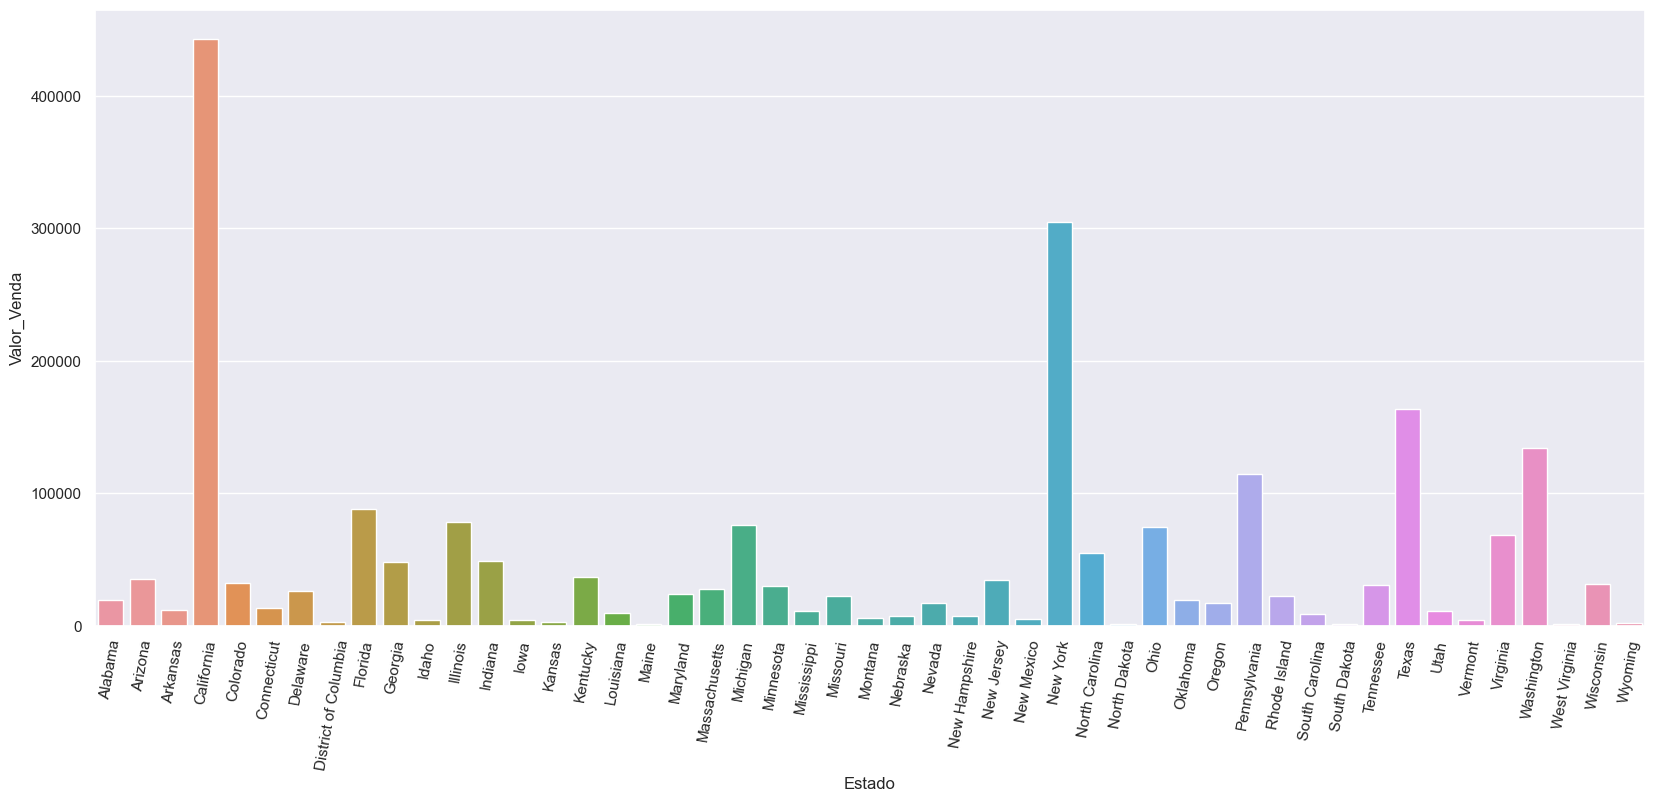

In [346]:
plt.figure(figsize = (20,8))
sns.barplot(y = dados3['Valor_Venda'], x = dados3['Estado'])
plt.xticks(rotation = 80)

## 4 - Quais São as 10 Cidades com Maior Total de Vendas?

Demonstre o resultado através de um gráfico de barras.

In [347]:
dados4 = dados.groupby(['Cidade']).sum().sort_values(['Valor_Venda'],ascending=False)[:10]
dados4

C:\Users\fnsb.DESKTOP-7T10APS\AppData\Local\Temp\ipykernel_1200\1898724147.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  dados4 = dados.groupby(['Cidade']).sum().sort_values(['Valor_Venda'],ascending=False)[:10]


,Valor_Venda,Desconto,Valor_Descontado
Cidade,,,
New York City,251749.2190,91.55,220073.30935
Los Angeles,171654.6330,73.40,151094.20860
Seattle,114725.4780,43.45,100151.59860
San Francisco,107489.9520,50.90,94236.60725
Philadelphia,107197.8030,53.40,94287.18345
Houston,61590.1868,36.90,54516.00612
San Diego,47458.3790,17.40,41712.32500
Chicago,46974.3430,30.75,41521.29445
Jacksonville,44713.1830,12.75,38753.94110


<Axes: xlabel='Cidade', ylabel='Valor_Venda'>

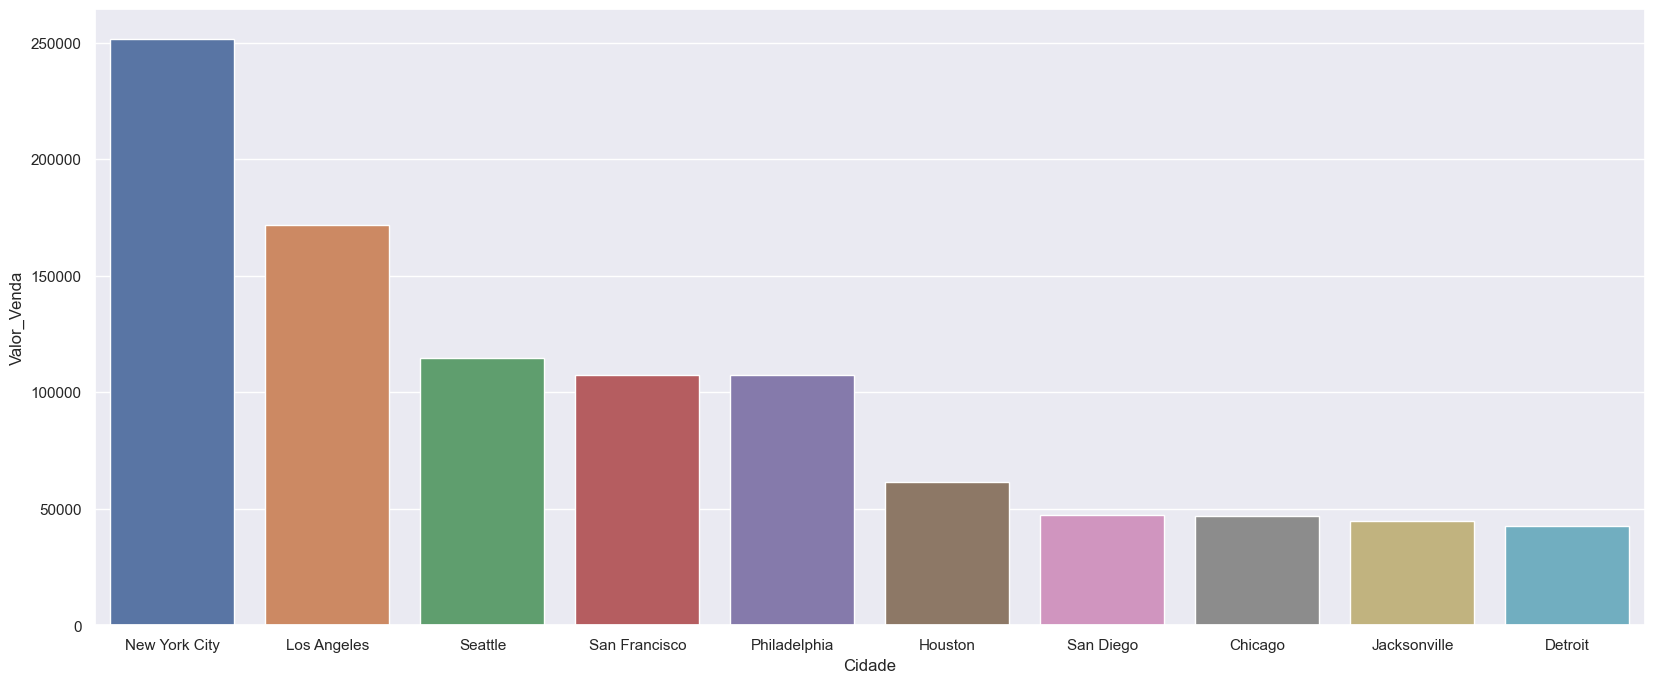

In [349]:
plt.figure(figsize = (20,8))
sns.barplot(y = dados4['Valor_Venda'], x = dados4.index)
#plt.xticks(rotation = 65)

## 5 - Qual Segmento Teve o Maior Total de Vendas?

Demonstre o resultado através de um gráfico de pizza.

In [350]:
dados5 = dados.groupby(['Segmento']).sum().sort_values(['Valor_Venda'],ascending=False)
dados5

C:\Users\fnsb.DESKTOP-7T10APS\AppData\Local\Temp\ipykernel_1200\381577893.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  dados5 = dados.groupby(['Segmento']).sum().sort_values(['Valor_Venda'],ascending=False)


,Valor_Venda,Desconto,Valor_Descontado
Segmento,,,
Consumer,1.133834e+06,514.95,996625.74584
Corporate,6.792322e+05,300.35,596729.83600
Home Office,4.224914e+05,177.55,370277.51881


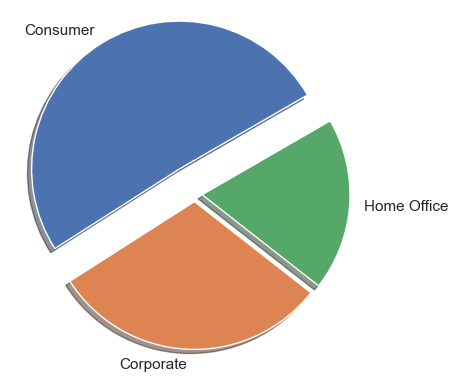

In [357]:
plt.pie(dados5['Valor_Venda'],
        labels = dados5.index,
        startangle = 30,
        explode = [0.2,0.05,0.05],
        shadow = True
        )

## 6 - Qual o Total de Vendas Por Segmento e Por Ano?

In [368]:
dados6 = dados[['Data_PedidoDT','Segmento','Valor_Venda']]
dados6['Ano'] = dados6['Data_PedidoDT'].dt.year
dados6G = dados6.groupby(['Segmento','Ano']).sum().reset_index().sort_values('Ano',ascending = True)

dados6G

C:\Users\fnsb.DESKTOP-7T10APS\AppData\Local\Temp\ipykernel_1200\3046826660.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dados6['Ano'] = dados6['Data_PedidoDT'].dt.year
C:\Users\fnsb.DESKTOP-7T10APS\AppData\Local\Temp\ipykernel_1200\3046826660.py:3: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  dados6G = dados6.groupby(['Segmento','Ano']).sum().reset_index().sort_values('Ano',ascending = True)


,Segmento,Ano,Valor_Venda
0,Consumer,2015,256719.9166
4,Corporate,2015,125819.5957
8,Home Office,2015,88229.0878
1,Consumer,2016,265295.2593
5,Corporate,2016,114643.1229
9,Home Office,2016,74134.1332
2,Consumer,2017,288459.5572
6,Corporate,2017,203266.7398
10,Home Office,2017,103639.6270
3,Consumer,2018,323359.6019


<Axes: xlabel='Ano', ylabel='Valor_Venda'>

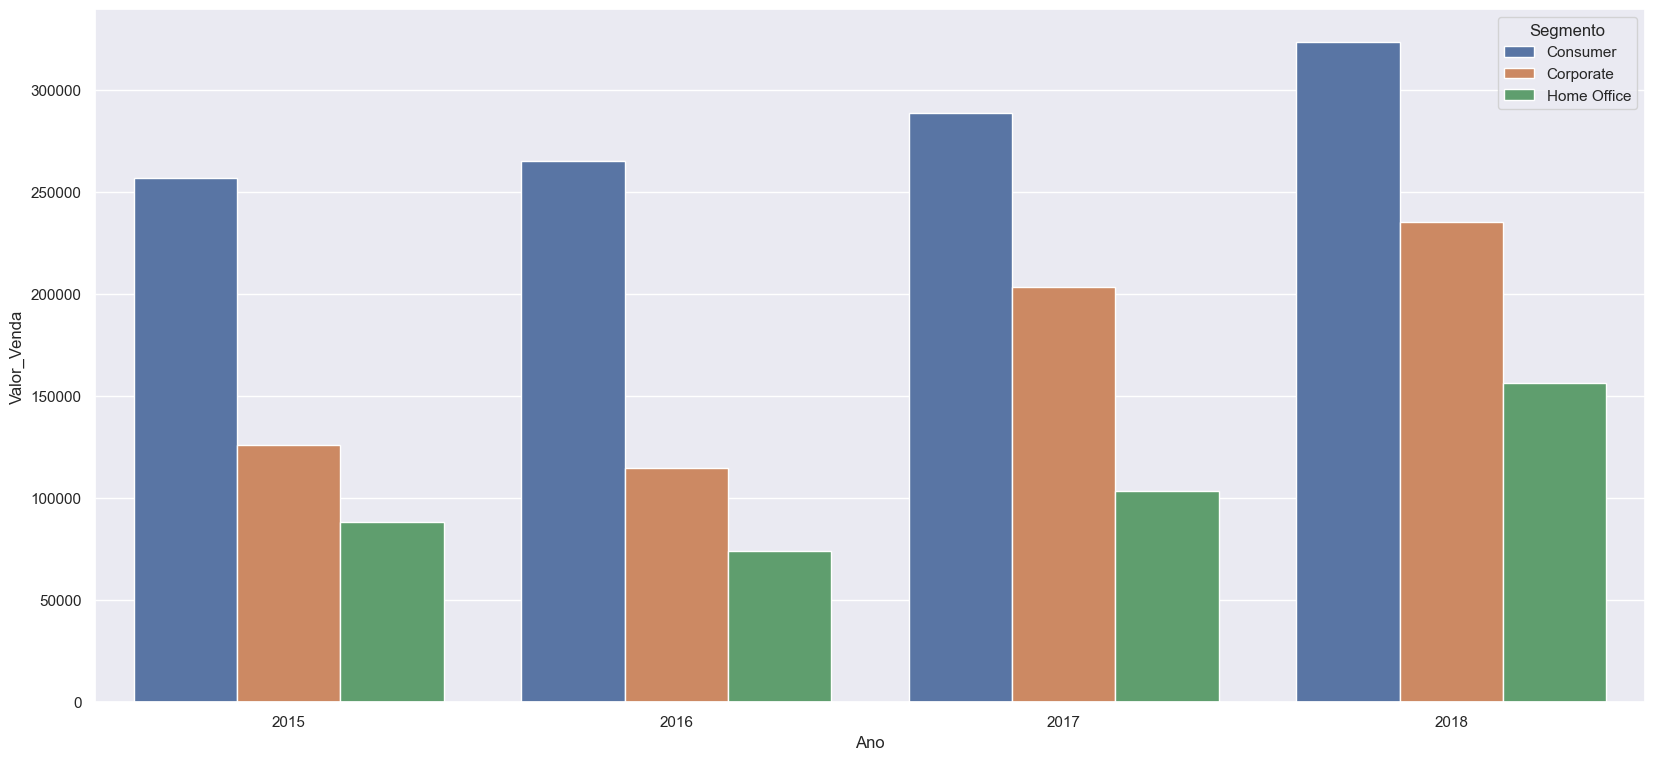

In [361]:
plt.figure(figsize = (20,9))

sns.barplot(data = dados6G, y = 'Valor_Venda', x = 'Ano', hue = 'Segmento')

## 7 - Desconto

Os gestores da empresa estão considerando conceder diferentes faixas de descontos e gostariam de fazer uma simulação com base na regra abaixo:  
Se o Valor_Venda for maior que 1000 recebe 15% de desconto.  
Se o Valor_Venda for menor que 1000 recebe 10% de desconto.  
Quantas Vendas Receberiam 15% de Desconto?  

In [367]:
dados['Desconto'] = dados['Valor_Venda'] <= 1000
dados['Desconto'] = dados['Desconto'].map({True:0.1,False:0.15})
dados['Desconto'].value_counts()

0.10    9243
0.15     457
Name: Desconto, dtype: int64

In [369]:
dados['Desconto'] = np.where(dados['Valor_Venda'] > 1000, 0.15, 0.10)
dados['Desconto'].value_counts()

0.10    9243
0.15     457
Name: Desconto, dtype: int64

## 8 - Considere Que a Empresa Decida Conceder o Desconto de 15% do Item Anterior. Qual seria a Média do Valor de Venda antes e depois do Desconto?

In [280]:
dados['Valor_Descontado'] = dados['Valor_Venda'] - dados['Valor_Venda']*dados['Desconto']

dados[['Valor_Venda','Valor_Descontado']].mean()

Valor_Venda         230.469892
Valor_Descontado    202.436402
dtype: float64

Considerando apenas os que forneceriam 15% de desconto:

In [372]:
dados.loc[dados['Desconto'] == 0.15][['Valor_Venda','Valor_Descontado']].mean().round(2)

Valor_Venda         2116.81
Valor_Descontado    1799.29
dtype: float64

## 9 - Qual a Média de Vendas Por Segmento, Por Ano e Por Mês?

Demonstre o resultado através de gráfico de linha.

In [378]:
dados['SeasonDate'] = dados['Data_PedidoDT'].dt.month

dados9M = pd.DataFrame()

for seg in dados['Segmento'].unique():
    dados9M[seg] = dados[dados['Segmento'] == seg].groupby(['SeasonDate']).mean()['Valor_Venda']

dados9M

C:\Users\fnsb.DESKTOP-7T10APS\AppData\Local\Temp\ipykernel_1200\4274671693.py:6: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  dados9M[seg] = dados[dados['Segmento'] == seg].groupby(['SeasonDate']).mean()['Valor_Venda']
C:\Users\fnsb.DESKTOP-7T10APS\AppData\Local\Temp\ipykernel_1200\4274671693.py:6: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  dados9M[seg] = dados[dados['Segmento'] == seg].groupby(['SeasonDate']).mean()['Valor_Venda']
C:\Users\fnsb.DESKTOP-7T10APS\AppData\Local\Temp\ipykernel_1200\4274671693.py:6: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a

,Consumer,Corporate,Home Office
SeasonDate,,,
1,269.636954,226.336153,329.268368
2,218.408888,263.574679,276.097483
3,219.003358,255.715994,444.702030
4,186.118679,233.593432,220.690093
5,203.862616,239.237153,141.820549
6,202.795654,197.047114,235.081155
7,220.089043,245.892110,159.278759
8,247.231541,289.840782,209.907969
9,248.307320,188.988578,188.263460


Text(0, 0.5, 'Média de Valor em Vendas')

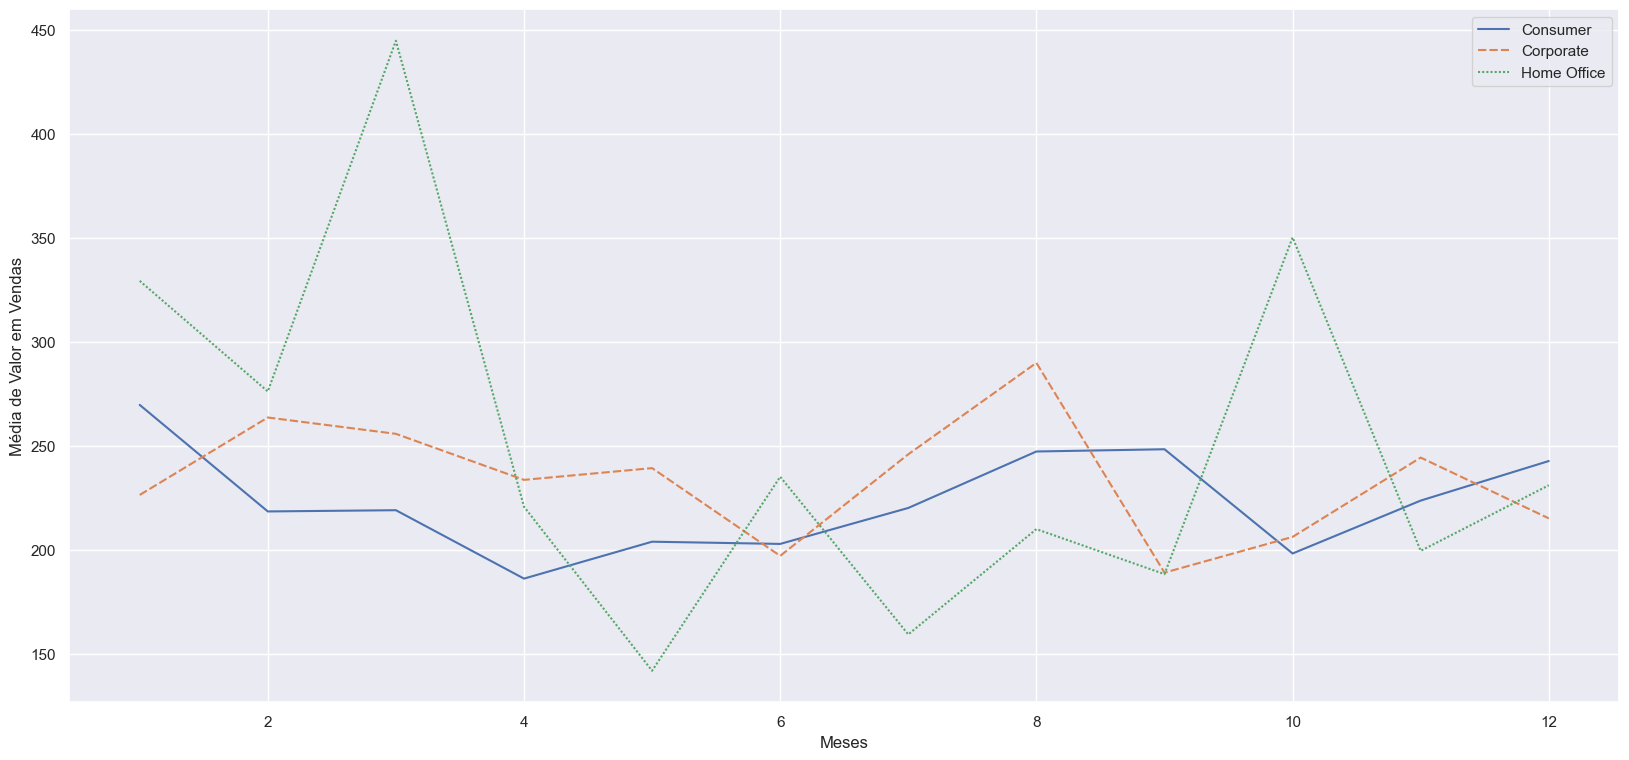

In [379]:
plt.figure(figsize = (20,9))

sns.lineplot(data = dados9M, sort = True)

plt.xlabel('Meses')
plt.ylabel('Média de Valor em Vendas')

In [380]:
dados['YearDate'] = dados['Data_PedidoDT'].dt.year

dados9Y = pd.DataFrame()

for seg in dados['Segmento'].unique():
    dados9Y[seg] = dados[dados['Segmento'] == seg].groupby(['YearDate']).mean()['Valor_Venda']

dados9Y

C:\Users\fnsb.DESKTOP-7T10APS\AppData\Local\Temp\ipykernel_1200\1320002311.py:6: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  dados9Y[seg] = dados[dados['Segmento'] == seg].groupby(['YearDate']).mean()['Valor_Venda']
C:\Users\fnsb.DESKTOP-7T10APS\AppData\Local\Temp\ipykernel_1200\1320002311.py:6: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  dados9Y[seg] = dados[dados['Segmento'] == seg].groupby(['YearDate']).mean()['Valor_Venda']
C:\Users\fnsb.DESKTOP-7T10APS\AppData\Local\Temp\ipykernel_1200\1320002311.py:6: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a fut

,Consumer,Corporate,Home Office
YearDate,,,
2015,250.703044,211.461505,292.149297
2016,239.004738,191.071872,221.958483
2017,223.785537,263.982779,230.310282
2018,200.098764,244.044278,242.617961


Text(0, 0.5, 'Média de Valor em Vendas')

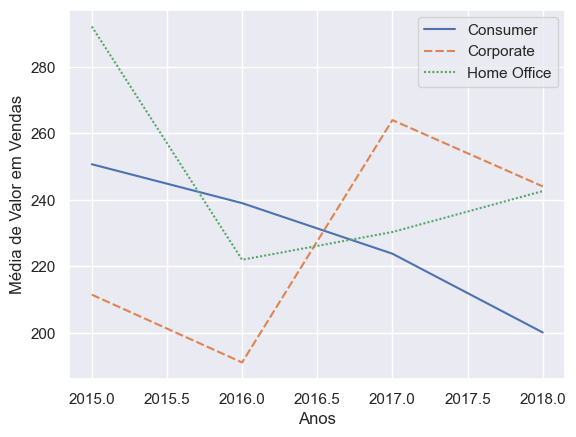

In [381]:
sns.lineplot(data = dados9Y, sort = True)

plt.xlabel('Anos')
plt.ylabel('Média de Valor em Vendas')

Um gráfico por ano.

In [388]:
dados9 = dados.groupby(['YearDate', 'SeasonDate', 'Segmento'])['Valor_Venda'].mean().reset_index()
dados9

,YearDate,SeasonDate,Segmento,Valor_Venda
0,2015,1,Consumer,246.253653
1,2015,1,Corporate,153.353067
2,2015,1,Home Office,274.220857
3,2015,2,Consumer,174.913378
4,2015,2,Corporate,93.877917
...,...,...,...,...
139,2018,11,Corporate,247.279342
140,2018,11,Home Office,268.215155
141,2018,12,Consumer,182.370217
142,2018,12,Corporate,158.423705


<Figure size 1200x600 with 0 Axes>

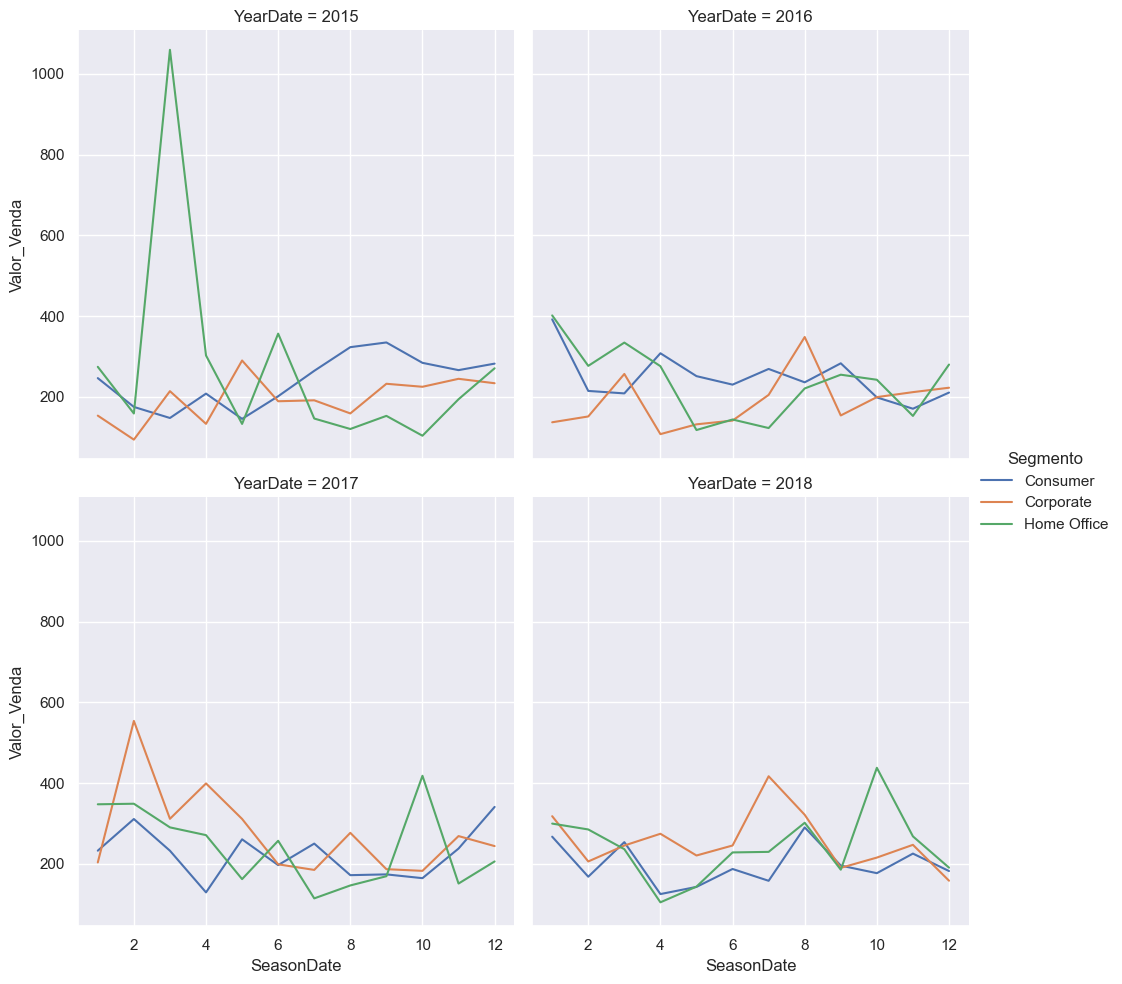

In [400]:
plt.figure(figsize = (12, 6))
sns.set()
sns.relplot(kind = 'line',
                   data = dados9, 
                   y = 'Valor_Venda', 
                   x = 'SeasonDate',
                   hue = 'Segmento', 
                   col = 'YearDate',
                   col_wrap = 2)

## 10 - Qual o Total de Vendas Por Categoria e SubCategoria, Considerando Somente as Top 12 SubCategorias?

Demonstre tudo através de um único gráfico.

In [285]:
dados.groupby(['Categoria']).sum().sort_values('Valor_Venda', ascending=False)

C:\Users\fnsb.DESKTOP-7T10APS\AppData\Local\Temp\ipykernel_1200\2049948890.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  dados.groupby(['Categoria']).sum().sort_values('Valor_Venda', ascending=False)


,Valor_Venda,Desconto,Valor_Descontado
Categoria,,,
Technology,823549.3810,188.20,718746.98920
Furniture,716910.8017,213.70,631485.62420
Office Supplies,695097.7720,590.95,613400.48725


In [286]:
dados.groupby(['Categoria']).count()['SubCategoria']

Categoria
Furniture          2055
Office Supplies    5851
Technology         1794
Name: SubCategoria, dtype: int64

In [287]:
dados.groupby(['SubCategoria']).sum().sort_values('Valor_Venda', ascending=False)[:12]

C:\Users\fnsb.DESKTOP-7T10APS\AppData\Local\Temp\ipykernel_1200\201831348.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  dados.groupby(['SubCategoria']).sum().sort_values('Valor_Venda', ascending=False)[:12]


,Valor_Venda,Desconto,Valor_Descontado
SubCategoria,,,
Phones,325271.2940,90.15,286990.85830
Chairs,317919.6250,63.30,279816.75990
Storage,216188.3620,84.75,191433.27010
Tables,202083.3600,34.15,176938.45555
Binders,194723.3810,149.10,169623.33495
Machines,189238.6310,13.65,162213.65840
Accessories,162791.3620,76.10,144162.61990
Copiers,146248.0940,8.30,125379.85260
Bookcases,108045.0467,23.50,95035.86235


In [288]:
TopSub = dados.groupby(['SubCategoria']).count()['Categoria'].sort_values(ascending=False)[:12]
for i in TopSub.index:
    print(i)

Binders
Paper
Furnishings
Phones
Storage
Art
Accessories
Chairs
Appliances
Labels
Tables
Envelopes


In [289]:
2 in [1,2,3]

True

In [290]:
BotSub = dados.groupby(['SubCategoria']).count()['Categoria'].sort_values(ascending=False)[12:]
for i in BotSub.index:
    print(i)

Bookcases
Fasteners
Supplies
Machines
Copiers


In [291]:
dadosTopSub = dados

for i in BotSub.index:
    print(i)
    dadosTopSub = dadosTopSub.drop(dados[dados['SubCategoria'] == i].index)

dadosTopSub['SubCategoria'].unique()

Bookcases
Fasteners
Supplies
Machines
Copiers


array(['Chairs', 'Labels', 'Tables', 'Storage', 'Furnishings', 'Art',
       'Phones', 'Binders', 'Appliances', 'Paper', 'Accessories',
       'Envelopes'], dtype=object)

In [401]:
dadosTopSub

,ID_Pedido,Data_Pedido,ID_Cliente,Segmento,Pais,Cidade,Estado,ID_Produto,Categoria,SubCategoria,Valor_Venda,Data_PedidoDT,SeasonDate,Desconto,Valor_Descontado,YearDate
1,CA-2017-152156,08/11/2017,CG-12520,Consumer,United States,Henderson,Kentucky,FUR-CH-10000454,Furniture,Chairs,731.9400,2017-08-11,08,0.1,658.74600,2017
2,CA-2017-138688,12/06/2017,DV-13045,Corporate,United States,Los Angeles,California,OFF-LA-10000240,Office Supplies,Labels,14.6200,2017-12-06,12,0.1,13.15800,2017
3,US-2016-108966,11/10/2016,SO-20335,Consumer,United States,Fort Lauderdale,Florida,FUR-TA-10000577,Furniture,Tables,957.5775,2016-11-10,11,0.1,861.81975,2016
4,US-2016-108966,11/10/2016,SO-20335,Consumer,United States,Fort Lauderdale,Florida,OFF-ST-10000760,Office Supplies,Storage,22.3680,2016-11-10,11,0.1,20.13120,2016
5,CA-2015-115812,09/06/2015,BH-11710,Consumer,United States,Los Angeles,California,FUR-FU-10001487,Furniture,Furnishings,48.8600,2015-09-06,09,0.1,43.97400,2015
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9694,CA-2017-122511,11/03/2017,BT-11485,Home Office,United States,Philadelphia,Pennsylvania,FUR-FU-10001037,Furniture,Furnishings,30.3360,2017-11-03,11,0.1,27.30240,2017
9695,CA-2018-154116,15/12/2018,KM-16660,Consumer,United States,Inglewood,California,OFF-PA-10004569,Office Supplies,Paper,22.8300,2018-12-15,12,0.1,20.54700,2018
9696,CA-2018-154116,15/12/2018,KM-16660,Consumer,United States,Inglewood,California,OFF-AP-10000027,Office Supplies,Appliances,54.3200,2018-12-15,12,0.1,48.88800,2018
9697,CA-2018-154116,15/12/2018,KM-16660,Consumer,United States,Inglewood,California,TEC-PH-10000675,Technology,Phones,196.7760,2018-12-15,12,0.1,177.09840,2018


<Figure size 2000x900 with 0 Axes>

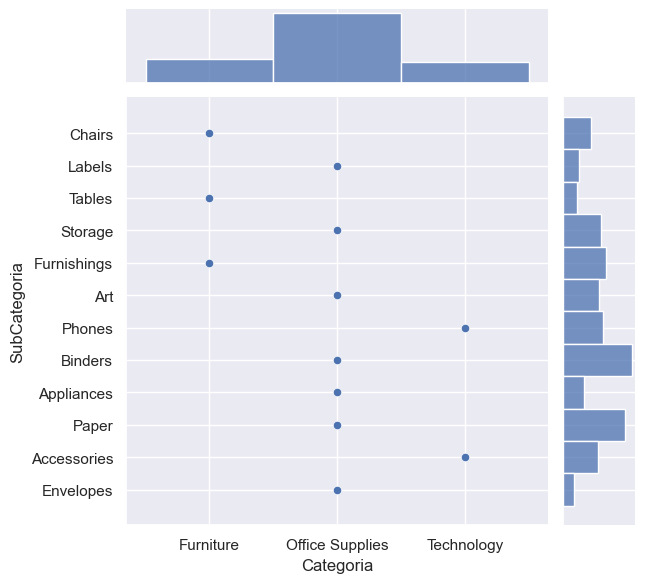

In [292]:
plt.figure(figsize = (20,9))
sns.jointplot(data = dadosTopSub, x = "Categoria", y = "SubCategoria",kind = 'scatter')

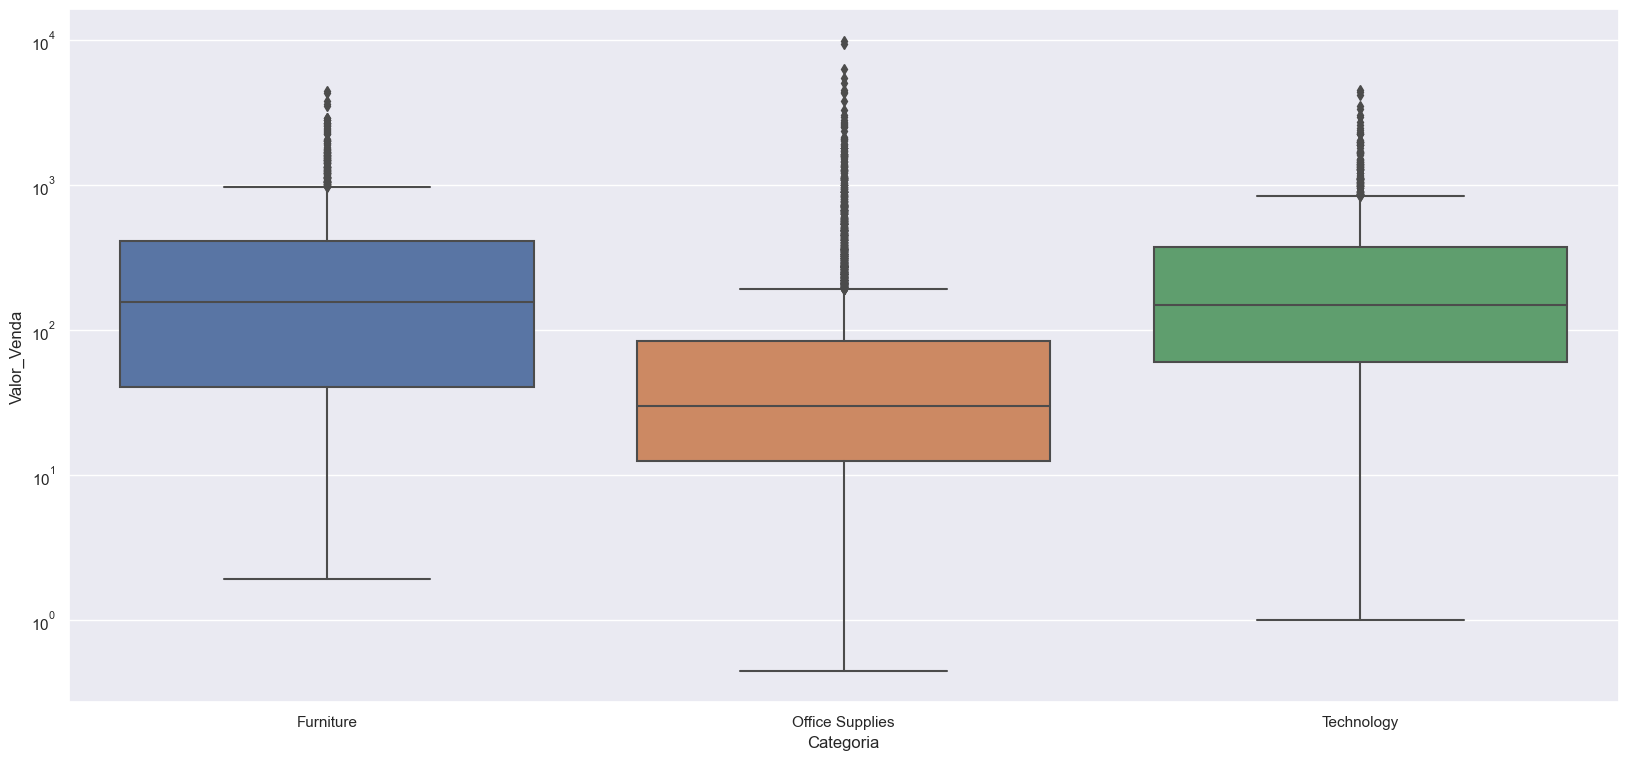

In [293]:
plt.figure(figsize = (20,9))
sns.boxplot(x = 'Categoria', y = 'Valor_Venda', data = dadosTopSub)
plt.yscale("log")

### Solução DSA considerando soma de valor de venda

São feitos três plots:  
1 - Categorias  
2 - Subcategorias  
3 - interior em branco

O gabarito considera as três melhores subcategorias dentro de cada categoria, mas aqui considerarei as 12 melhores categorias em geral.

In [411]:
dados10Sub = dadosTopSub.groupby(['Categoria','SubCategoria']).sum().sort_values('Categoria').reset_index()
dados10Sub

C:\Users\fnsb.DESKTOP-7T10APS\AppData\Local\Temp\ipykernel_1200\1614825345.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  dados10Sub = dadosTopSub.groupby(['Categoria','SubCategoria']).sum().sort_values('Categoria').reset_index()


,Categoria,SubCategoria,Valor_Venda,Desconto,Valor_Descontado
0,Furniture,Chairs,317919.625,63.30,279816.75990
1,Furniture,Furnishings,88862.770,92.75,79694.54640
2,Furniture,Tables,202083.360,34.15,176938.45555
3,Office Supplies,Appliances,104061.693,46.45,91938.64420
4,Office Supplies,Art,26573.736,77.85,23860.71120
5,Office Supplies,Binders,194723.381,149.10,169623.33495
6,Office Supplies,Envelopes,15791.182,24.50,14212.06380
7,Office Supplies,Labels,12267.366,35.40,11040.62940
8,Office Supplies,Paper,76312.764,132.90,68681.48760
9,Office Supplies,Storage,216188.362,84.75,191433.27010


As subcategorias não se repetem. É preciso ordenar ambos segundo a categoria para que as subcategorias se encaixem adequadamente.

In [412]:
dados10Cat = dadosTopSub.groupby(['Categoria']).sum().sort_values('Categoria').reset_index()
dados10Cat

C:\Users\fnsb.DESKTOP-7T10APS\AppData\Local\Temp\ipykernel_1200\3356750556.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  dados10Cat = dadosTopSub.groupby(['Categoria']).sum().sort_values('Categoria').reset_index()


,Categoria,Valor_Venda,Desconto,Valor_Descontado
0,Furniture,608865.755,190.20,536449.76185
1,Office Supplies,645918.484,550.95,570790.14125
2,Technology,488062.656,166.25,431153.47820


In [413]:
# Listas de cores para categorias
cores_categorias = ['#5d00de',
                    '#0ee84f',
                    '#e80e27']

In [414]:
# Listas de cores para subcategorias
cores_subcategorias1 = ['#aa8cd4',
                       '#aa8cd5',
                       '#aa8cd6',
                       '#aa8cd7',
                       '#26c957',
                       '#26c958',
                       '#26c959',
                       '#26c960',
                       '#e65e65',
                       '#e65e66',
                       '#e65e67',
                       '#e65e68']

In [420]:
# Listas de cores para subcategorias
cores_subcategorias = ['#aa8cd4',
                       '#aa8cd5',
                       '#aa8cd6',
                       '#26c956',
                       '#26c957',
                       '#26c958',
                       '#26c959',
                       '#26c960',
                       '#26c961',
                       '#26c962',
                       '#e65e67',
                       '#e65e68']

In [434]:
# Função para converter os dados em valor absoluto
def autopct_format(values): 
    def my_format(pct): 
        total = sum(values) 
        val = int(round(pct * total / 100.0))
        return ' $ {v:d}'.format(v = val)
    return my_format

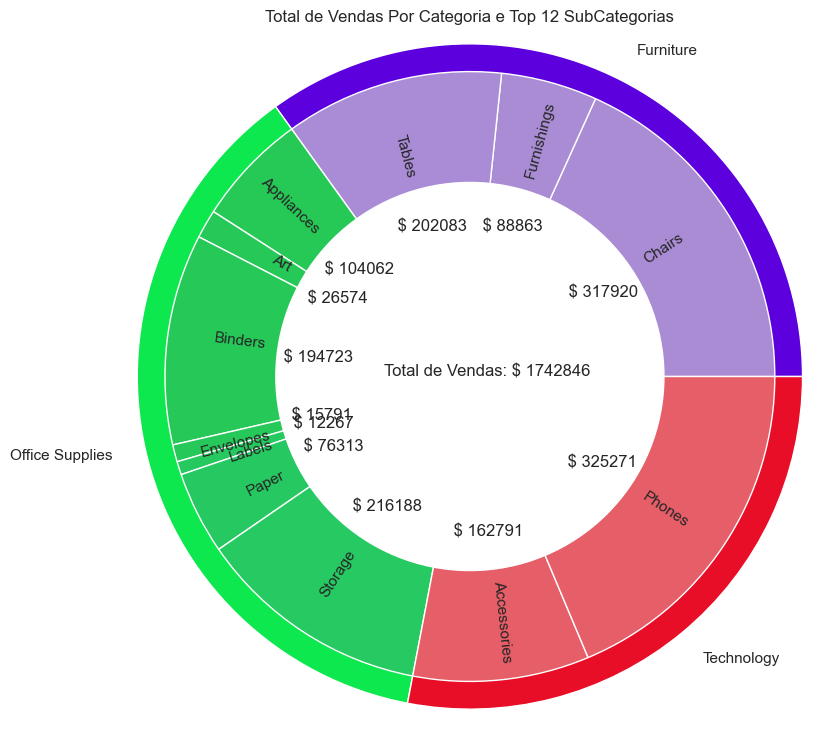

In [463]:
# Gráfico

# Tamanho da figura
fig, ax = plt.subplots(figsize = (16,9))

# Gráfico das categorias
p1 = ax.pie(dados10Cat['Valor_Venda'], # dado principal
            radius = 1.2, # raio da ciscunferência
            labels = dados10Cat['Categoria'], # Nomes dos setores
            wedgeprops = dict(edgecolor = 'white'), # linhas de divisão = {'edgecolor':'white}
            colors = cores_categorias) # cores dos setores, em ordem

# Gráfico das subcategorias
p2 = ax.pie(dados10Sub['Valor_Venda'], # dado principal
            radius = 1.1, # raio da ciscunferência
            labels = dados10Sub['SubCategoria'], # Nomes dos setores
            autopct = autopct_format(dados10Sub['Valor_Venda']), # valores dentro do disco; é fornecida uma função, como se aplicasse um .map()
            colors = cores_subcategorias,  # cores dos setores, em ordem
            labeldistance = 0.67, # distância dos nomes dos setores para o centro
            wedgeprops = dict(edgecolor = 'white'),  # linhas de divisão = {'edgecolor':'white}
            pctdistance = 0.51, # Distância dos valores para o centro
            rotatelabels = True) # Para que os nomes dos setores tenham o centro como origem

# Limpa o centro do círculo
centre_circle = plt.Circle((0, 0), 0.7, fc = 'white') # ((x,y),raio,fundo)

# Labels e anotações
fig = plt.gcf()
fig.gca().add_artist(centre_circle)
plt.annotate(text = 'Total de Vendas: ' + '$ ' + str(int(sum(dados10Sub['Valor_Venda']))), xy = (-0.31, 0))
plt.title('Total de Vendas Por Categoria e Top 12 SubCategorias')
plt.show()

In [470]:
s = 'Data Science Academy'

s[2]

't'